Warming up the model...
Warm-up complete.


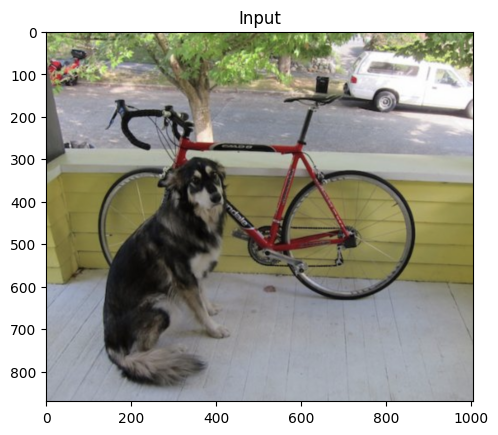

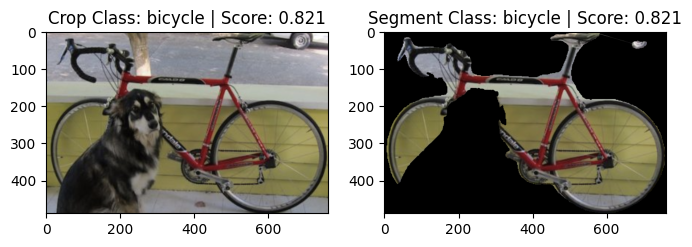

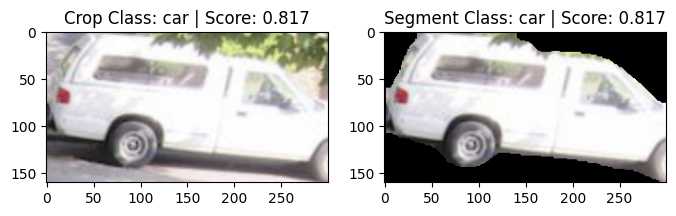

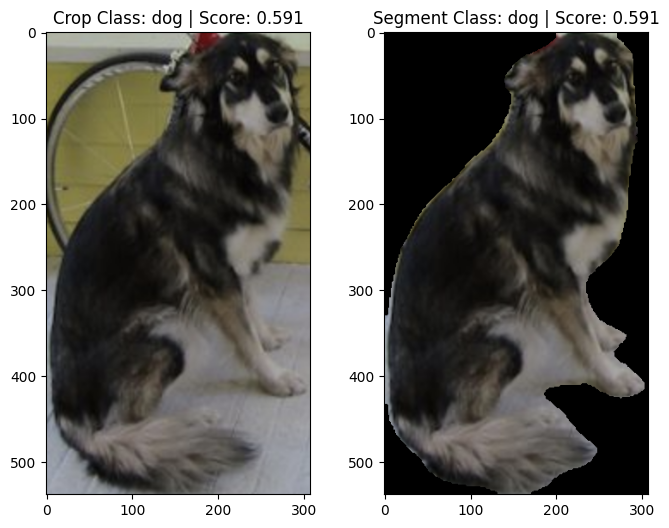

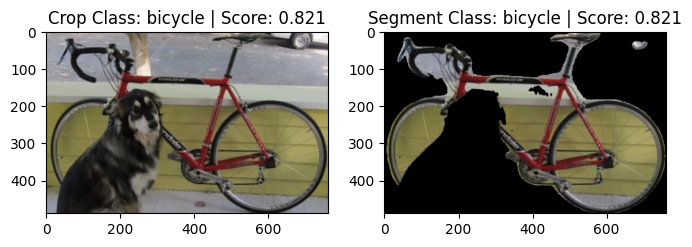

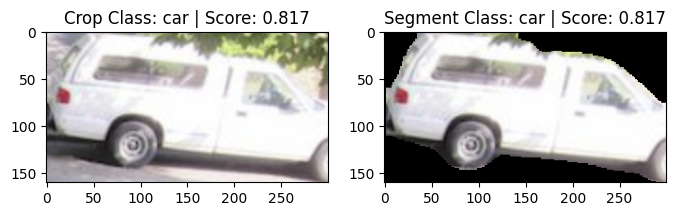

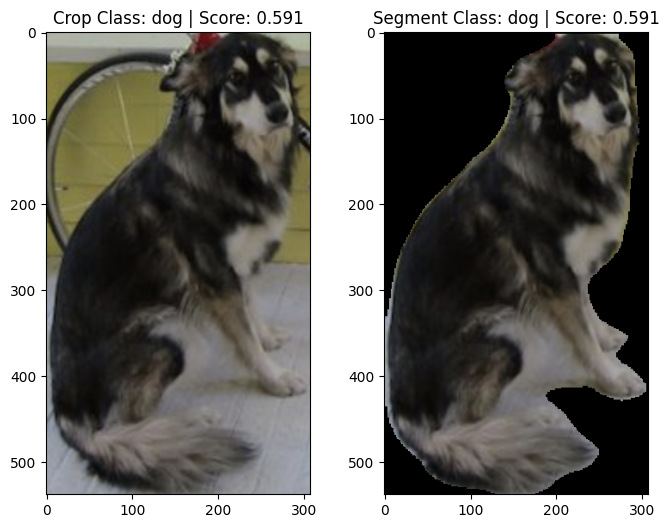

In [1]:
%reset -f
import cv2
import supervision as sv
from supervision.detection.core import Detections
# from ultralytics import YOLO
from util.YoloModel import YoloSegmentation
import matplotlib.pyplot as plt

image = cv2.imread(r"images\detect\car.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

yolo_model = YoloSegmentation(r"models\yolo11n-seg.pt")

image = cv2.imread(r"images\detect\multiple1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_with_bbox = image.copy()

plt.imshow(image)
plt.title(f"Input")
plt.show()

results = yolo_model.predict(image)
for box, mask, score, cls_name in yolo_model.decode_results(results):

    pt1 = (box[0], box[1])
    pt2 = (box[2], box[3])
    cv2.rectangle(image_with_bbox, pt1, pt2, (255,255,0), 3)
    
    # Crop and plot
    crop_image = yolo_model.extract_object(image, box, 0)
    plt.figure(figsize=(8, 6))
    plt.subplot(1,2,1)
    plt.imshow(crop_image)
    plt.title(f"Crop Class: {cls_name} | Score: {score:.3f}")

    segment_image = yolo_model.segment_object(image, box, mask, 0)
    plt.subplot(1,2,2)
    plt.imshow(segment_image)
    plt.title(f"Segment Class: {cls_name} | Score: {score:.3f}")
    plt.show()

results = yolo_model.tracking(image)
for idx, box, mask, score, cls_name in yolo_model.decode_detections(results):

    pt1 = (box[0], box[1])
    pt2 = (box[2], box[3])
    cv2.rectangle(image_with_bbox, pt1, pt2, (255,255,0), 3)
    
    # Crop and plot
    crop_image = yolo_model.extract_object(image, box, 0)
    plt.figure(figsize=(8, 6))
    plt.subplot(1,2,1)
    plt.imshow(crop_image)
    plt.title(f"Crop Class: {cls_name} | Score: {score:.3f}")

    segment_image = yolo_model.segment_object(image, box, mask, 0)
    plt.subplot(1,2,2)
    plt.imshow(segment_image)
    plt.title(f"Segment Class: {cls_name} | Score: {score:.3f}")
    plt.show()